In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings("ignore")
 
import re
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [7]:
import io
from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['amazon_reviews_1.csv']))
df=pd.read_csv('amazon_reviews_1.csv')
df.head()

Saving amazon_reviews_1.csv to amazon_reviews_1 (1).csv


,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category
0,35311,UK,4652511,R2PF9XCB2AOY7C,B00MNYTWMI,174964168,Midnight Castle – A Free Hidden Object Mystery...,Mobile_Apps,5,0,1,N,Y,2014-09-16,"Addictive game Very good game, the graphics ar...",1
1,44590,UK,8778070,R2OVRHVTCC7U18,B00I8Q77Y0,370420344,Flappy Wings (not Flappy Bird),Mobile_Apps,2,1,2,N,Y,2014-02-16,Where to start? I came on here because I wante...,0
2,90295,UK,8476187,RRPSNSVU2RNE4,B008PEHK6U,173475712,Man of Steel [DVD],Video DVD,3,1,5,N,N,2013-12-28,Really Disappointed in this Film I have to say...,0
3,38798,UK,4329864,R1WK44Y81XH276,B00NWLIW0E,13526192,Goat Simulator,Mobile_Apps,1,3,5,N,N,2014-12-26,"Rubbish game When I tried to open it, it said ...",0
4,43364,UK,8080547,R2UL591NPU40SN,B00HRC40T6,887316735,Shadow Blade,Mobile_Apps,1,0,0,N,Y,2015-06-29,One Star Come on,0


In [8]:
df.columns

Index(['Unnamed: 0', 'marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_date', 'review', 'review_category'],
      dtype='object')

In [9]:
l=['marketplace','product_category','verified_purchase','vine','review_category','helpful_votes', 'total_votes']

for i in l:
  print('The unique element in : ', i)
  print('-'*30)
  print(df[i].unique())
  print()

The unique element in :  marketplace
------------------------------
['UK']

The unique element in :  product_category
------------------------------
['Mobile_Apps' 'Video DVD' 'Music' 'Books']

The unique element in :  verified_purchase
------------------------------
['Y' 'N']

The unique element in :  vine
------------------------------
['N' 'Y']

The unique element in :  review_category
------------------------------
[1 0]

The unique element in :  helpful_votes
------------------------------
[  0   1   3   5  14   2   4  29  32   9   6  13  20  19  17   7  22  15
  18  28  31   8  10  11 190 100  30  16  42  12  38  35 102  95  27  69
  37  49  36  84 133  68 184  62  43  26  24  44  21 419  33  77  25 109
  97  39  76  56 175  46  23  80 166  34  48  63 292  41  86 127  58  70
  53  79  45 229 163  51 380 105  47 297 244  55 117 103  50  75 135 101
  90]

The unique element in :  total_votes
------------------------------
[  1   2   5   0  33  41  10   3   4  19  11  45   8  31   6

In [10]:
l=['product_category','verified_purchase','vine','review_category','helpful_votes', 'total_votes']

for i in l:
  print('The unique element in : ', i)
  print('-'*30)
  print(df[i].value_counts())
  print()

The unique element in :  product_category
------------------------------
Books          2624
Music          2493
Video DVD      2469
Mobile_Apps    2414
Name: product_category, dtype: int64

The unique element in :  verified_purchase
------------------------------
Y    8119
N    1881
Name: verified_purchase, dtype: int64

The unique element in :  vine
------------------------------
N    9990
Y      10
Name: vine, dtype: int64

The unique element in :  review_category
------------------------------
0    5046
1    4954
Name: review_category, dtype: int64

The unique element in :  helpful_votes
------------------------------
0      6891
1      1183
2       475
3       298
4       207
       ... 
58        1
53        1
77        1
101       1
175       1
Name: helpful_votes, Length: 91, dtype: int64

The unique element in :  total_votes
------------------------------
0      5205
1      1411
2       765
3       431
4       314
       ... 
202       1
178       1
130       1
82        1
123

The count plot of  :  product_category
------------------------------


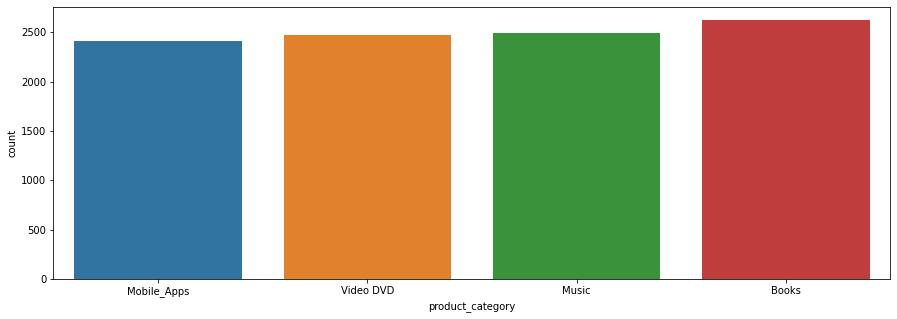


The count plot of  :  verified_purchase
------------------------------


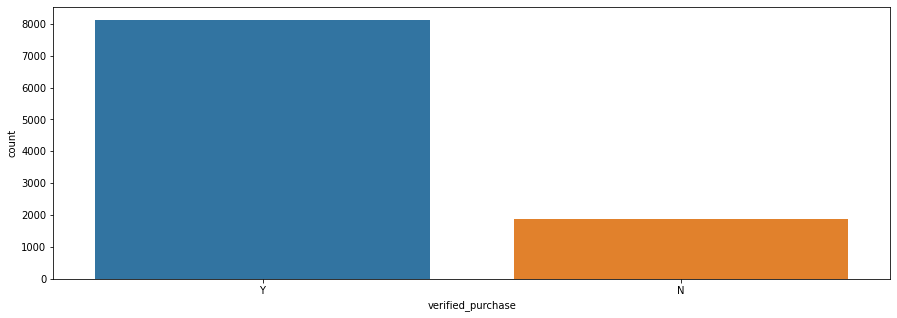


The count plot of  :  vine
------------------------------


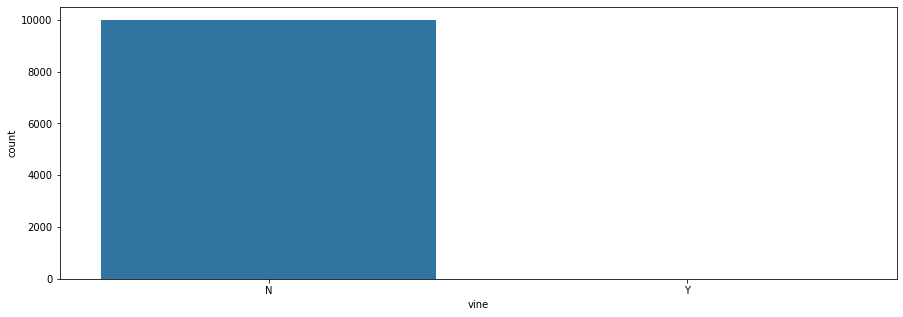


The count plot of  :  review_category
------------------------------


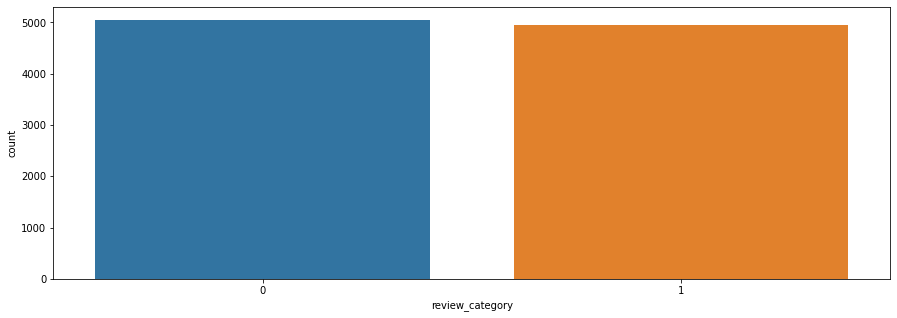


The count plot of  :  helpful_votes
------------------------------


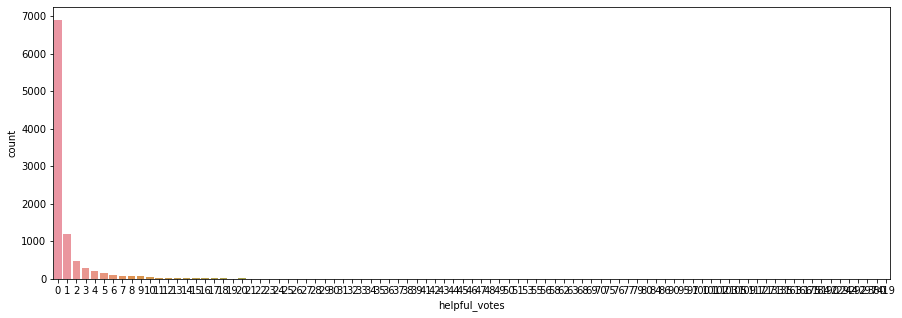


The count plot of  :  total_votes
------------------------------


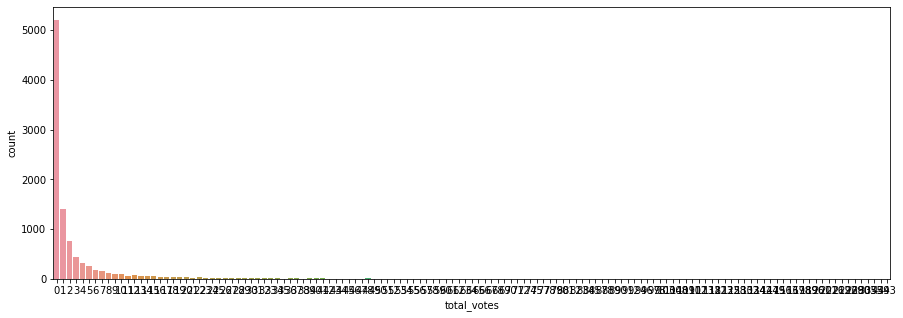

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
l=['product_category','verified_purchase','vine','review_category','helpful_votes', 'total_votes']

for i in l:
  print('The count plot of  : ', i)
  print('-'*30)
  plt.figure(figsize=(15,5))
  sns.countplot(df[i])
  plt.show()
  print()
  

In [12]:
df_new=df[['star_rating','review']]
df_new.head()

,star_rating,review
0,5,"Addictive game Very good game, the graphics ar..."
1,2,Where to start? I came on here because I wante...
2,3,Really Disappointed in this Film I have to say...
3,1,"Rubbish game When I tried to open it, it said ..."
4,1,One Star Come on


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  10000 non-null  int64 
 1   review       9999 non-null   object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [14]:
df_new.dropna(inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  9999 non-null   int64 
 1   review       9999 non-null   object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [15]:
df_new['star_rating'].value_counts()

5    4149
3    2350
1    1661
2    1035
4     804
Name: star_rating, dtype: int64

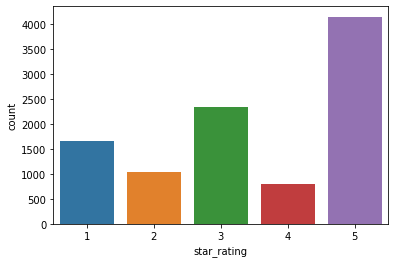

In [16]:
#show the visualizing count of target feature.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df_new['star_rating'])

In [17]:
df_new.head(1)

,star_rating,review
0,5,"Addictive game Very good game, the graphics ar..."


In [18]:
df_new["rating"] = df_new["star_rating"].apply(lambda x : 1 if x>3 else 0)
df_new.head(3)

,star_rating,review,rating
0,5,"Addictive game Very good game, the graphics ar...",1
1,2,Where to start? I came on here because I wante...,0
2,3,Really Disappointed in this Film I have to say...,0


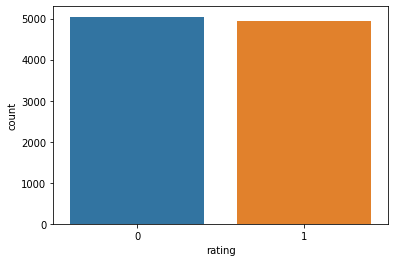

In [19]:
#show the visualizing count of target feature.

sns.countplot(df_new['rating'])

4. Text preprocessing
In this step, following operations are performed on the review text

* Removing website links
* Removing html tags
* Decontracting(expanding from the original form)
* Removing the words with numeric digits
* Removing non-word characters
* Converting to lower case
* Removing stop words
* Performing Lemmatization

In [20]:
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [21]:
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             # removing website links
    review = BeautifulSoup(review, 'lxml').get_text()   # removing html tags
    review = decontract(review)                         # decontracting
    review = re.sub("\S*\d\S*", "", review).strip()     # removing the words with numeric digits
    review = re.sub('[^A-Za-z]+', ' ', review)          # removing non-word characters
    review = review.lower()                             # converting to lower case
    review = [word for word in review.split(" ") if not word in stopwords] # removing stop words
    review = [lemmatizer.lemmatize(token, "v") for token in review] #Lemmatization
    review = " ".join(review)
    review.strip()
    return review
df_new['cleaned_text'] = df_new['review'].apply(lambda x: preprocess_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [22]:
df_new.head(20)

,star_rating,review,rating,cleaned_text
0,5,"Addictive game Very good game, the graphics ar...",1,addictive game good game graphics brilliant gr...
1,2,Where to start? I came on here because I wante...,0,start come want get flappy bird saw think basi...
2,3,Really Disappointed in this Film I have to say...,0,really disappoint film say look forward remake...
3,1,"Rubbish game When I tried to open it, it said ...",0,rubbish game try open say stop fix higher rat
4,1,One Star Come on,0,one star come
5,5,Five Stars brilliant fast postage and 48:13 wa...,1,five star brilliant fast postage fab thank
6,5,Five Stars The CD is excellent but I wish your...,1,five star cd excellent wish review system woul...
7,1,Not worth buying As a family we are huge Matt ...,0,worth buy family huge matt damon fan especiall...
8,5,Five Stars good buy,1,five star good buy
9,1,One Star Did not like at all,0,one star like


In [23]:
df_final=df_new[['rating','cleaned_text']]
df_final.head()

,rating,cleaned_text
0,1,addictive game good game graphics brilliant gr...
1,0,start come want get flappy bird saw think basi...
2,0,really disappoint film say look forward remake...
3,0,rubbish game try open say stop fix higher rat
4,0,one star come


When star Rating is :  0
______________________________



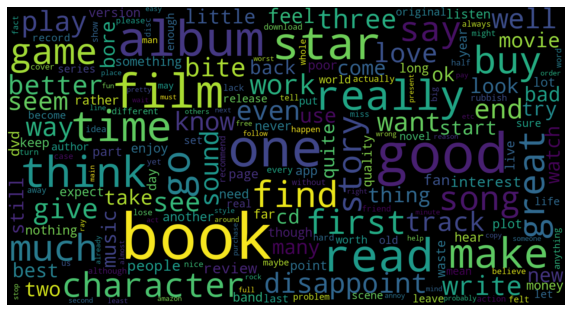

When star Rating is :  1
______________________________



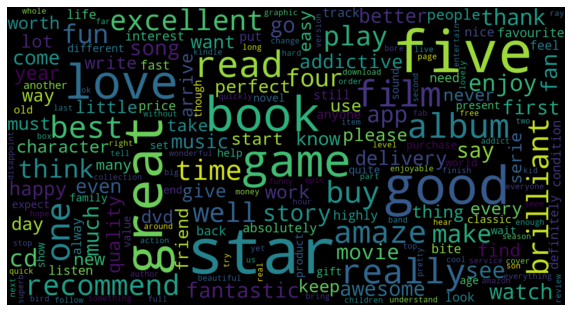

In [24]:
#most common words used
from wordcloud import WordCloud

for i in range (0,2):
  print('When star Rating is : ', i)
  print('_'*30)
  print()
  text = df_final[df_final['rating'] == i]
  all_words = ' '.join([text for text in text.cleaned_text])
  wordcloud = WordCloud(width= 1500, height= 800,
                              max_font_size = 170,
                              collocations = False).generate(all_words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


When star Rating is :  0
______________________________



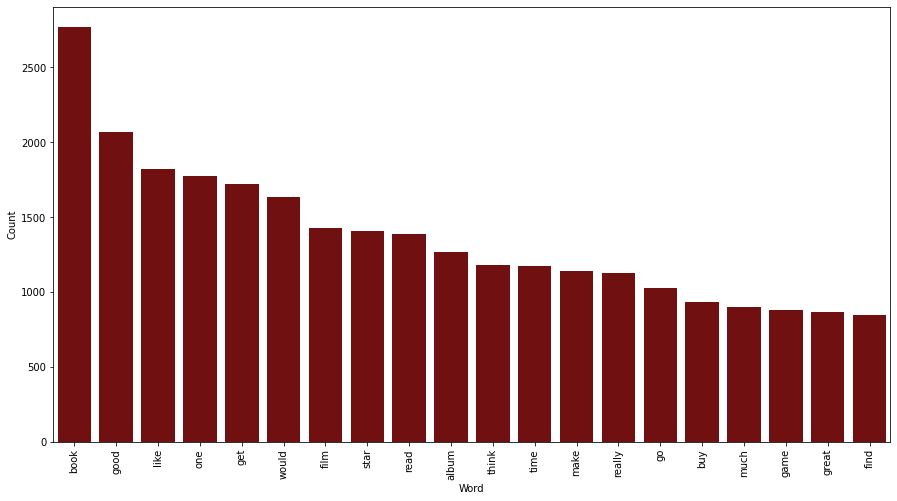


When star Rating is :  1
______________________________



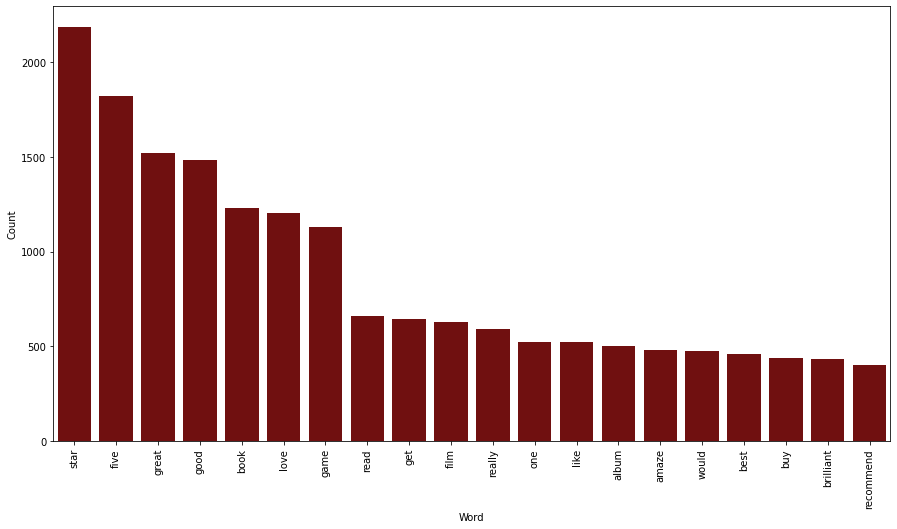

In [25]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'maroon')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


for i in range(0,2):
  print('When star Rating is : ', i)
  print('_'*30)
  print()
  counter(df_final[df_final['rating'] == i], 'cleaned_text', 20)
  print()

In [26]:
train_df, test_df = train_test_split(df_final, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (7999, 2)
Test data size :  (2000, 2)


6. Model Building
6.1 Fitting LSTM with Embedding layer

In [27]:
top_words = 6000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(train_df['cleaned_text'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['cleaned_text'])

max_review_length = 130
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = train_df['rating']

In [28]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           192032    
_________________________________________________________________
lstm (LSTM)                  (None, 200)               186400    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 378,633
Trainable params: 378,633
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 30s 12ms/step - loss: 0.5203 - accuracy: 0.7483 - val_loss: 0.2719 - val_accuracy: 0.8900
Epoch 2/20
800/800 [==============================] - 8s 10ms/step - loss: 0.2259 - accuracy: 0.9153 - val_loss: 0.2742 - val_accuracy: 0.8894
Epoch 3/20
800/800 [==============================] - 8s 10ms/step - loss: 0.1381 - accuracy: 0.9510 - val_loss: 0.3179 - val_accuracy: 0.8806
Epoch 4/20
800/800 [==============================] - 8s 10ms/step - loss: 0.0926 - accuracy: 0.9682 - val_loss: 0.3316 - val_accuracy: 0.8850
Epoch 5/20
800/800 [==============================] - 8s 11ms/step - loss: 0.0615 - accuracy: 0.9797 - val_loss: 0.3978 - val_accuracy: 0.8844
Epoch 6/20
800/800 [==============================] - 8s 10ms/step - loss: 0.0546 - accuracy: 0.9843 - val_loss: 0.4403 - val_accuracy: 0.8813
Epoch 7/20
800/800 [==============================] - 8s 10ms/step - loss: 0.0662 - accuracy: 0.9794 - val_loss: 0.4784 - val_accuracy: 0.871

## Adding dropout

In [30]:

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 32)           192032    
_________________________________________________________________
dropout (Dropout)            (None, 130, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 245,333
Trainable params: 245,333
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 4s 19ms/step - loss: 0.6247 - accuracy: 0.6407 - val_loss: 0.3311 - val_accuracy: 0.8644
Epoch 2/5
100/100 [==============================] - 1s 12ms/step - loss: 0.3325 - accuracy: 0.8688 - val_loss: 0.2945 - val_accuracy: 0.8781
Epoch 3/5
100/100 [==============================] - 1s 12ms/step - loss: 0.2581 - accuracy: 0.8956 - val_loss: 0.2759 - val_accuracy: 0.8813
Epoch 4/5
100/100 [==============================] - 1s 13ms/step - loss: 0.1736 - accuracy: 0.9353 - val_loss: 0.2735 - val_accuracy: 0.8844
Epoch 5/5
100/100 [==============================] - 1s 13ms/step - loss: 0.1403 - accuracy: 0.9505 - val_loss: 0.2966 - val_accuracy: 0.8800


6.2 Evaluating model performance on test data

In [32]:
list_tokenized_test = tokenizer.texts_to_sequences(test_df['cleaned_text'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['rating']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1-score: ', f1_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

Accuracy of the model :  0.8765
F1-score:  0.8711528429838289
Confusion matrix:


array([[918, 111],
       [136, 835]])

# ML

In [33]:
df_final.head(2)

,rating,cleaned_text
0,1,addictive game good game graphics brilliant gr...
1,0,start come want get flappy bird saw think basi...


In [34]:
x=df_final['cleaned_text']
y=df_final['rating']
print(x[:5])
print(y[:5])

0    addictive game good game graphics brilliant gr...
1    start come want get flappy bird saw think basi...
2    really disappoint film say look forward remake...
3        rubbish game try open say stop fix higher rat
4                                        one star come
Name: cleaned_text, dtype: object
0    1
1    0
2    0
3    0
4    0
Name: rating, dtype: int64


In [35]:
#countvectoriser with stemming

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(max_features=5000, ngram_range=(2,2))
x_stem=CV.fit_transform(x).toarray()
x_stem           

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7999, 5000), (2000, 5000), (7999,), (2000,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import metrics

In [39]:
clf_logit_pca = LogisticRegression()
clf_tree_pca = DecisionTreeClassifier()
clf_svm_pca = SVC(probability = True)
clf_rf_pca= RandomForestClassifier(n_estimators=100)
clf_gb_pca= GradientBoostingClassifier(n_estimators=100)
clf_bag_pca= BaggingClassifier(n_estimators=100)
clf_nb_pca= GaussianNB()
clf_sgd_pca= SGDClassifier(loss='modified_huber',shuffle=True, random_state=101)
clf_knn_pca= KNeighborsClassifier(n_neighbors=15)
clf_etc_pca= ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

In [40]:
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC', 'RandomForestClassifier',
               'GradientBoostingClassifier', 'BaggingClassifier', 'GaussianNB', 'SGDClassifier', 
               'KNeighborsClassifier', 'ExtraTreesClassifier' ]

In [41]:
models = {clf_logit_pca: 'LogisticRegression', 
          clf_tree_pca: 'DecisionTreeClassifier', 
          clf_svm_pca: 'SVC',
          clf_rf_pca: 'RandomForestClassifier',
          clf_gb_pca: 'GradientBoostingClassifier',
          clf_bag_pca: 'BaggingClassifier',
          clf_nb_pca: 'GaussianNaiveBayes',
          clf_sgd_pca: 'StochasticGradientDescent',
          clf_knn_pca: 'KNN',
          clf_etc_pca: 'ExtraTreesClassifier'}

In [42]:

def train(algo, name, X_train, y_train, X_test, y_test):
    algo.fit(X_train, y_train)
    y_test_pred = algo.predict(X_test)
    return y_test_pred


def performance(algo, name, X_test, y_test, y_test_pred):
    # Accuracy Score
    score = metrics.accuracy_score(y_test, y_test_pred)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(metrics.classification_report(y_test, y_test_pred))
    
    # ROC AUC Score
    prob = algo.predict_proba(X_test)
    prob = prob[:, 1]
    roc_auc = metrics.roc_auc_score(y_test, prob)
    print(roc_auc)
    
    # Plotting ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    
    return roc_auc


def main(models):
    auc = []
    for algo, name in models.items():
        print('#'*40, name, '#'*40)
        y_test_pred = train(algo, name, X_train, y_train, X_test, y_test)
        roc_auc = performance(algo, name, X_test, y_test, y_test_pred)
        auc.append(roc_auc)
    return auc

######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.8265


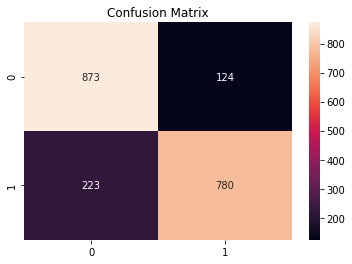

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       997
           1       0.86      0.78      0.82      1003

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

0.9162422461802157


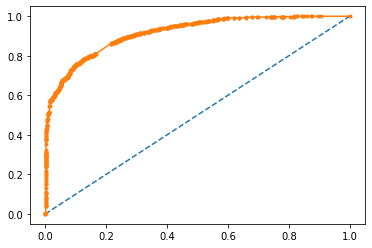

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.7495


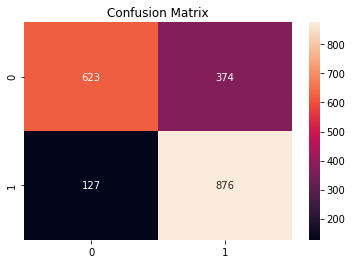

              precision    recall  f1-score   support

           0       0.83      0.62      0.71       997
           1       0.70      0.87      0.78      1003

    accuracy                           0.75      2000
   macro avg       0.77      0.75      0.75      2000
weighted avg       0.77      0.75      0.75      2000

0.8037397336576029


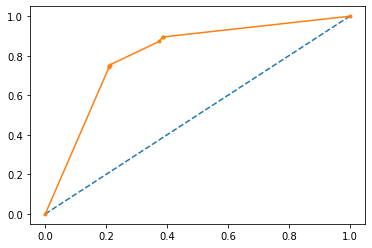

######################################## SVC ########################################
Accuracy score for SVC : 0.813


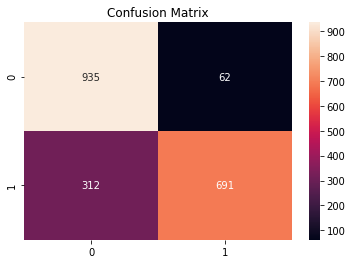

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       997
           1       0.92      0.69      0.79      1003

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000

0.9135582220239982


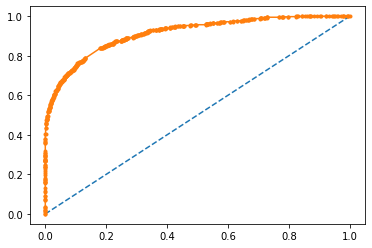

######################################## RandomForestClassifier ########################################
Accuracy score for RandomForestClassifier : 0.786


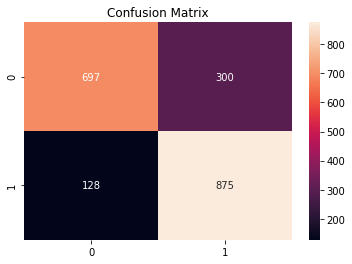

              precision    recall  f1-score   support

           0       0.84      0.70      0.77       997
           1       0.74      0.87      0.80      1003

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.78      2000
weighted avg       0.79      0.79      0.78      2000

0.8985515869642827


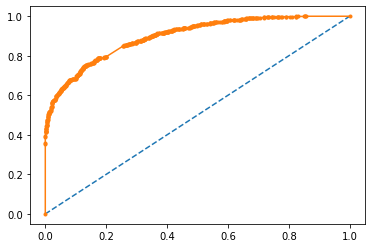

######################################## GradientBoostingClassifier ########################################
Accuracy score for GradientBoostingClassifier : 0.76


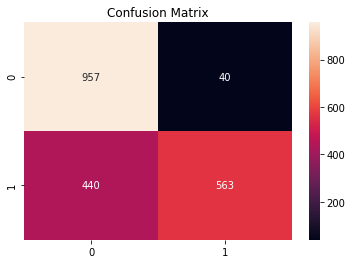

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       997
           1       0.93      0.56      0.70      1003

    accuracy                           0.76      2000
   macro avg       0.81      0.76      0.75      2000
weighted avg       0.81      0.76      0.75      2000

0.8493766443897995


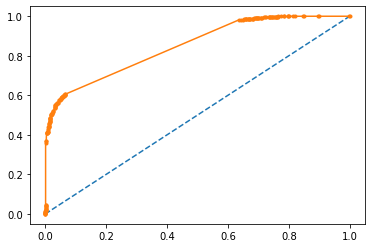

######################################## BaggingClassifier ########################################
Accuracy score for BaggingClassifier : 0.7595


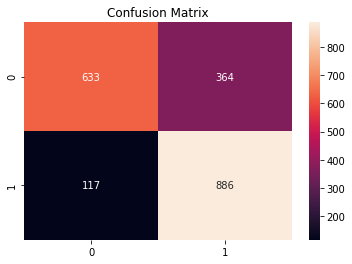

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       997
           1       0.71      0.88      0.79      1003

    accuracy                           0.76      2000
   macro avg       0.78      0.76      0.76      2000
weighted avg       0.78      0.76      0.76      2000

0.8789239103151927


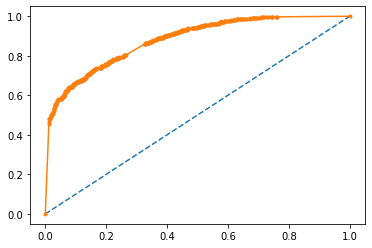

######################################## GaussianNaiveBayes ########################################
Accuracy score for GaussianNaiveBayes : 0.733


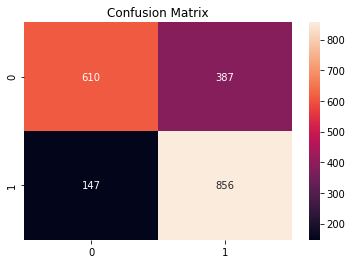

              precision    recall  f1-score   support

           0       0.81      0.61      0.70       997
           1       0.69      0.85      0.76      1003

    accuracy                           0.73      2000
   macro avg       0.75      0.73      0.73      2000
weighted avg       0.75      0.73      0.73      2000

0.7325640930768378


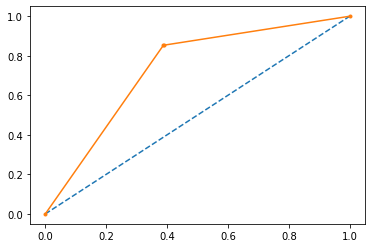

######################################## StochasticGradientDescent ########################################
Accuracy score for StochasticGradientDescent : 0.8095


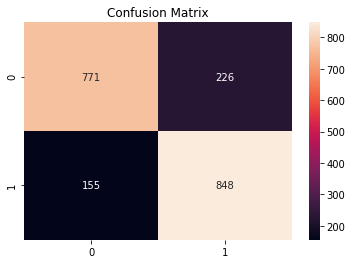

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       997
           1       0.79      0.85      0.82      1003

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

0.8780164021476193


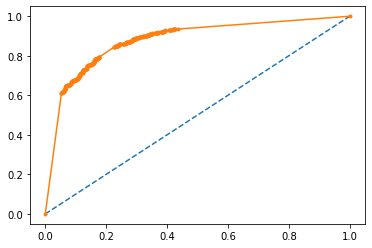

######################################## KNN ########################################
Accuracy score for KNN : 0.6745


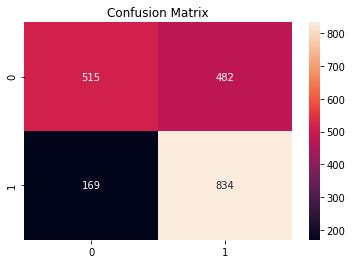

              precision    recall  f1-score   support

           0       0.75      0.52      0.61       997
           1       0.63      0.83      0.72      1003

    accuracy                           0.67      2000
   macro avg       0.69      0.67      0.67      2000
weighted avg       0.69      0.67      0.67      2000

0.806555759001831


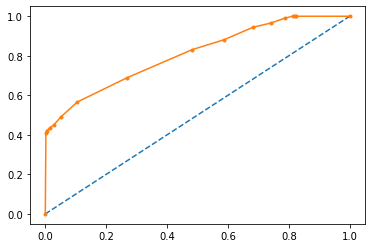

######################################## ExtraTreesClassifier ########################################
Accuracy score for ExtraTreesClassifier : 0.784


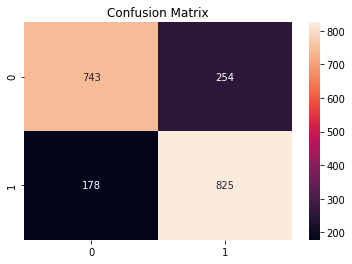

              precision    recall  f1-score   support

           0       0.81      0.75      0.77       997
           1       0.76      0.82      0.79      1003

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000

0.8714433429900871


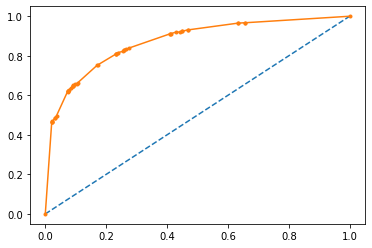

CPU times: user 1h 11min 9s, sys: 4.89 s, total: 1h 11min 14s
Wall time: 1h 10min 49s


In [43]:
%%time

auc = main(models)

In [44]:

model_comp_df = pd.DataFrame(auc, columns = ['ROC AUC'], index = classifiers)

model_comp_df.sort_values(by='ROC AUC', ascending=False)

,ROC AUC
LogisticRegression,0.916242
SVC,0.913558
RandomForestClassifier,0.898552
BaggingClassifier,0.878924
SGDClassifier,0.878016
ExtraTreesClassifier,0.871443
GradientBoostingClassifier,0.849377
KNeighborsClassifier,0.806556
DecisionTreeClassifier,0.803740
GaussianNB,0.732564


In [45]:
from textblob import TextBlob

In [46]:
df_new.columns

Index(['star_rating', 'review', 'rating', 'cleaned_text'], dtype='object')

#polarity

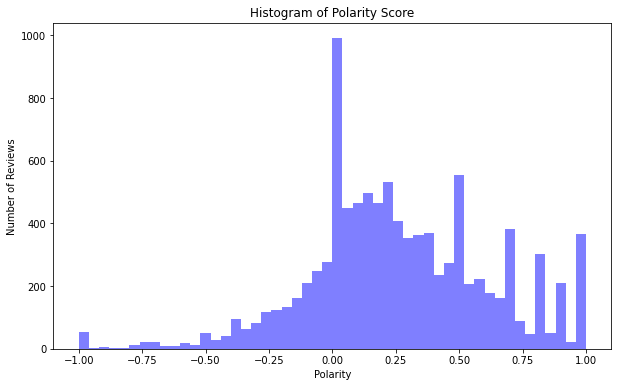

In [47]:
df_new['review']= df_new['review'].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df_new['polarity'] = df_new['review'].apply(pol) 
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_new.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

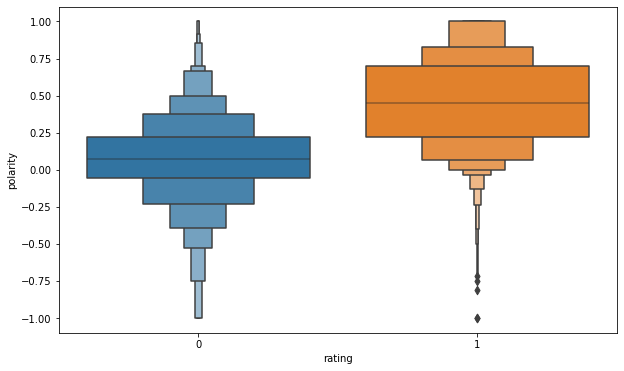

In [48]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='rating', y='polarity', data=df_new)
plt.show();

#subjectivity

In [49]:
sub = lambda x: TextBlob(x).sentiment.subjectivity
df_new['subjectivity'] = df_new['review'].apply(sub)
df_new.sample(10)

,star_rating,review,rating,cleaned_text,polarity,subjectivity
5047,5,"Great boxset Never a dull moment, seriously. B...",1,great boxset never dull moment seriously buy n...,0.208929,0.755952
3181,4,Four Stars Very happy,1,four star happy,1.000000,1.000000
8899,5,alot cheaper and more stuff Cheaper than at wa...,1,alot cheaper stuff cheaper warner bros studio ...,0.650000,0.625000
3156,1,I don't know. It seemed to be taking up a lot ...,0,know seem take lot storage space cancel finish...,0.170000,0.426667
733,5,Five Stars Awesome,1,five star awesome,1.000000,1.000000
9311,3,DVD missing Bought from Wonderbook. No DVD in ...,0,dvd miss buy wonderbook dvd case second time h...,-0.066667,0.058333
8475,3,sometimes a bit hard Good game to pass time ho...,0,sometimes bite hard good game pass time howeve...,0.002083,0.416667
4765,2,Is this real? Contents are the exact same as r...,0,real content exact real one think paper page t...,0.125000,0.408333
9542,4,amazing It is a brilliant game but I think k t...,1,amaze brilliant game think k coin earn game open,0.140000,0.640000
8668,3,Not my Cup of Tea at All but Bought as Christm...,0,cup tea buy christmas present really want buy ...,0.229167,0.341667


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

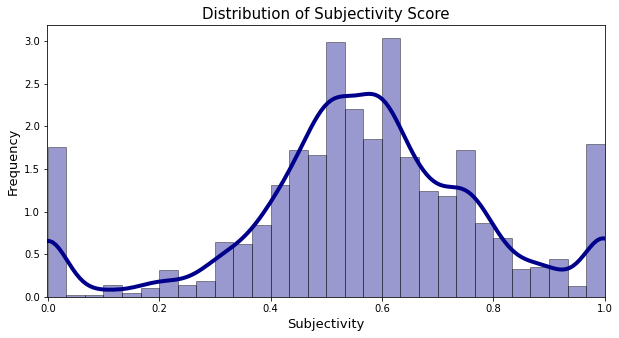

In [50]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df_new['subjectivity'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

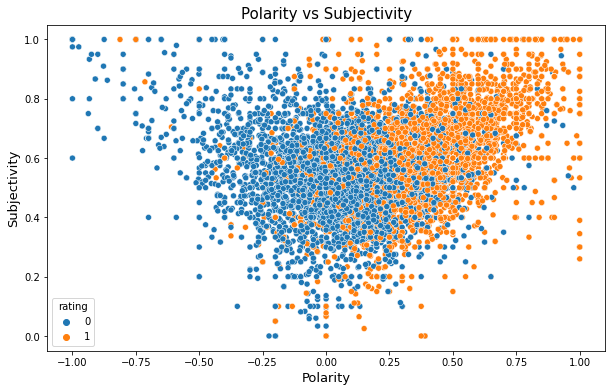

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="rating", data=df_new)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();